In [22]:
import numpy as np
import matplotlib.pyplot as plt
from math import ceil, floor

### Функция с занятия

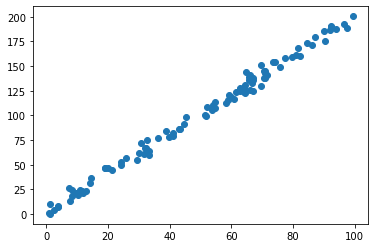

In [23]:
N = 100
X = np.random.uniform(low=0, high=100, size=N)
Y = 2*X + 1 + np.random.normal(scale=5, size=N)

plt.scatter(X, Y)
plt.show()

### Градиентный спуск без надстроек

In [24]:
def cost_function(x, y, theta0, theta1):
    total_cost = 0
    for i in range(len(X)):
        total_cost += (theta0 + theta1*x[i] - y[i]) ** 2
    return total_cost / (2 * len(x))

In [25]:
def der_theta0(x, y, theta0, theta1):
    total_cost = 0
    for i in range(len(x)):
        total_cost += (theta0 + theta1*x[i] - y[i])
    return total_cost / (len(x))    

In [26]:
def der_theta1(x, y, theta0, theta1):
    total_cost = 0
    for i in range(len(x)):
        total_cost += (theta0 + theta1*x[i] - y[i]) * x[i]
    return total_cost / (len(x))  

In [27]:
epochs_gd = 20
lr_gd = 0.0001

In [28]:
theta0 = 1
theta1 = 1
for _ in range(epochs_gd):
    dt0 = der_theta0(X, Y, theta0, theta1)
    dt1 = der_theta1(X, Y, theta0, theta1)
    
    theta0 -= lr_gd * dt0
    theta1 -= lr_gd * dt1
    
    print("t0:", theta0, "t1:", theta1, "cost:", cost_function(X, Y, theta0, theta1))

t0: 1.0050596978860986 t1: 1.3299926672170694 cost: 754.3223804090575
t0: 1.0084610544490822 t1: 1.5512827300067569 cost: 345.18739288818296
t0: 1.0107503416597379 t1: 1.6996777789854058 cost: 161.20241090329694
t0: 1.012293884713925 t1: 1.7991900705876707 cost: 78.46572147794421
t0: 1.0133373380773638 t1: 1.865922013525196 cost: 41.2596405099955
t0: 1.0140454354817534 t1: 1.9106717419517818 cost: 24.528337477602932
t0: 1.0145286459237801 t1: 1.9406803899916132 cost: 17.00439067693497
t0: 1.01486104894443 t1: 1.9608037987240476 cost: 13.620923887653461
t0: 1.0150923216346293 t1: 1.9742982526182848 cost: 12.099400341803998
t0: 1.0152557770161663 t1: 1.9833473874999343 cost: 11.415178904069085
t0: 1.0153737545094883 t1: 1.989415530415354 cost: 11.107486032871359
t0: 1.0154612347341592 t1: 1.9934846462478586 cost: 10.969115273873012
t0: 1.015528263562367 t1: 1.9962132320418486 cost: 10.90688741680023
t0: 1.0155815776679593 t1: 1.9980428701439563 cost: 10.878900459830781
t0: 1.015625694605

### Градиентный спуск c надстройкой RMSProp

In [29]:
theta0_rms = 1
theta1_rms = 1
epochs_rms = 20
lr_rms = 0.0001
eta = 8e-2
eps = 1e-8
gamma_rms = 0.9

In [30]:
theta = np.array([theta0_rms, theta1_rms])
expected_grad = np.array([0,0])

In [31]:
for epoch in range(epochs_rms):
    grad = np.asarray([der_theta0(X,Y,theta[0],theta[1]), der_theta1(X,Y,theta[0],theta[1])])
    expected_grad = gamma_rms * expected_grad + (1 - gamma_rms) * np.square(grad)
    RMS_grad = np.sqrt(expected_grad + eps)
    delta_theta = -(eta/RMS_grad) * grad
    theta = theta + delta_theta
    print(f"theta0: {theta[0]}, theta1: {theta[1]}, cost: {cost_function(X, Y, theta[0], theta[1])}")

theta0: 1.2529822128085295, theta1: 1.2529822128134693, cost: 925.1433835361241
theta0: 1.4090744566661815, theta1: 1.4090566218761413, cost: 577.5995620507592
theta0: 1.5244007391343466, theta1: 1.5243547235462818, cost: 373.96502379823585
theta0: 1.615241971761747, theta1: 1.6151586263492503, cost: 245.35762807790937
theta0: 1.6888882189393455, theta1: 1.6887584304703938, cost: 161.65541752589877
theta0: 1.7493661861290473, theta1: 1.7491805248404564, cost: 106.6850929055525
theta0: 1.7992232833371657, theta1: 1.7989718987878667, cost: 70.70115255354114
theta0: 1.8402456956825528, theta1: 1.839918323228013, cost: 47.41598904747591
theta0: 1.873794905522026, theta1: 1.8733809325408342, cost: 32.61315836787648
theta0: 1.9009802221232344, theta1: 1.9004687857592966, cost: 23.41446315976472
theta0: 1.9227508815361425, theta1: 1.9221309765808483, cost: 17.850856464714084
theta0: 1.939944849233643, theta1: 1.939205428240366, cost: 14.588298463666668
theta0: 1.95331309830993, theta1: 1.9524

### Градиентный спуск c надстройкой Nesterov Momentum

In [39]:
theta0_nest = 1
theta1_nest = 1
epochs_nest = 20
lr_nest = 0.0001
eta = 8e-2
eps = 1e-8
gamma_nest = 0.9

In [40]:
theta = np.array([theta0_nest, theta1_nest])
velocity = np.array([0, 0])

In [41]:
for epoch in range(epochs_nest):
    
    look_ahead_theta = theta - gamma_nest*velocity
    grad = np.asarray([der_theta0(X,Y,theta[0],theta[1]), der_theta1(X,Y,theta[0],theta[1])])
    # update the params
    velocity = gamma_nest * velocity + eta * grad
    theta = theta - velocity

    print(f"theta0: {theta[0]}, theta1: {theta[1]}, cost: {cost_function(X, Y, theta[0], theta[1])}")

theta0: 5.04775830887887, theta1: 264.9941337736555, cost: 113944547.88351299
theta0: -1048.599947697866, theta1: -68803.08384558074, cost: 7799150257375.808
theta0: 274620.53242257127, theta1: 18001034.001857217, cost: 5.3382760434503526e+17
theta0: -71846908.32457244, theta1: -4709494280.57872, cost: 3.6538840996339773e+22
theta0: 18796845069.08449, theta1: 1232114714059.5544, cost: 2.500970145584443e+27
theta0: -4917697739136.097, theta1: -322350251960849.8, cost: 1.7118363633184886e+32
theta0: 1286585645956517.2, theta1: 8.433442418444374e+16, cost: 1.1716988065423993e+37
theta0: -3.3660113170592685e+17, theta1: -2.206387325357342e+19, cost: 8.019914301805602e+41
theta0: 8.806279024003662e+19, theta1: 5.772429321211279e+21, cost: 5.489382173060924e+46
theta0: -2.30393016968105e+22, theta1: -1.5102035751126842e+24, cost: 3.7573115507150575e+51
theta0: 6.027624394251019e+24, theta1: 3.951048529780093e+26, cost: 2.5717630225160315e+56
theta0: -1.5769686215446226e+27, theta1: -1.033687